In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

NBINS = 20

In [28]:
fn = "~/Documents/research/tansey/msk_intern/pyro_model/data/rep-gdsc-ctd2-mean-log.csv"
df = pd.read_csv(fn)
df.head()

,Drug.Name,ccle,drug_id,sample_id,REP_published_auc_mean,CTD2_published_auc_mean,GDSC_published_auc_mean,REP_auc_overlap_mean,CTD2_auc_overlap_mean,GDSC_auc_overlap_mean,log_REP_published_auc_mean,log_CTD2_published_auc_mean,log_GDSC_published_auc_mean,log_REP_auc_overlap_mean,log_CTD2_auc_overlap_mean,log_GDSC_auc_overlap_mean
0,MASITINIB,MFE296,0,0,2.418060,0.254280,0.593273,0.912542,0.593923,0.868955,1.591848,0.302591,0.457048,0.654899,0.468167,0.554420
1,MASITINIB,PSN1,0,1,2.723739,0.825330,0.308393,0.912542,0.754841,0.873705,1.722505,0.726041,0.312686,0.654899,0.559771,0.556469
2,MASITINIB,KYSE150,0,2,1.806341,0.863541,0.783193,0.912542,0.754000,0.818837,1.306098,0.752933,0.548257,0.654899,0.559299,0.532672
3,MASITINIB,ESS1,0,3,1.939192,0.590966,0.213433,0.912542,0.717525,0.700777,1.371203,0.557295,0.262369,0.654899,0.538754,0.480509
4,MASITINIB,A172,0,4,2.821828,0.849530,0.308393,0.912542,0.749597,0.875567,1.762925,0.743093,0.312686,0.654899,0.556826,0.557272


In [29]:
print('df rows: ' + str(len(df)))
# drop rows with nans
df = df.dropna()
print('df rows after dropping NaNs: ' + str(len(df)))
print('num samples: ' + str(df.sample_id.nunique()))
print('num drugs: ' + str(df.drug_id.nunique()))

df rows: 16588
df rows after dropping NaNs: 16588
num samples: 318
num drugs: 84


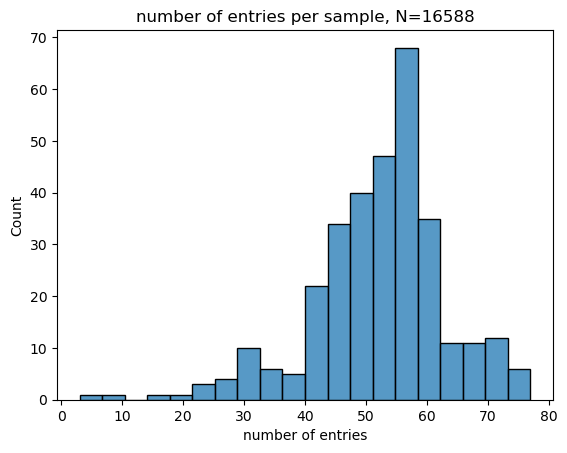

In [30]:
n_entries = df.groupby('sample_id')['sample_id'].count().reset_index(name='count')['count'].to_numpy()
title = 'number of entries per sample, N=' + str(np.sum(n_entries))
plt.xlabel('number of entries')
plt.title(title)
sns.histplot(n_entries, bins=NBINS)
plt.show()

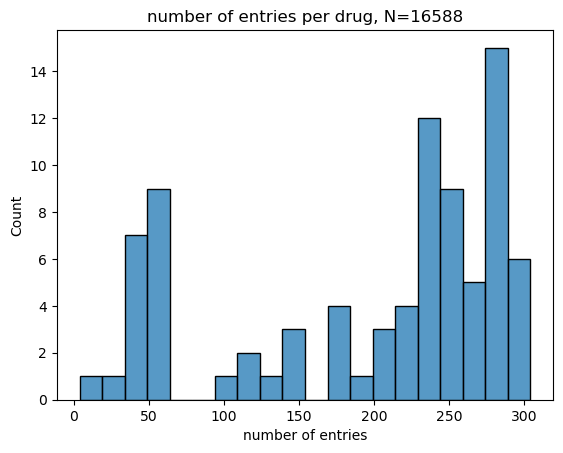

In [31]:
n_entries = df.groupby('drug_id')['drug_id'].count().reset_index(name='count')['count'].to_numpy()
title = 'number of entries per drug, N=' + str(np.sum(n_entries))
plt.xlabel('number of entries')
plt.title(title)
sns.histplot(n_entries, bins=NBINS)
plt.show()

<Figure size 640x480 with 0 Axes>

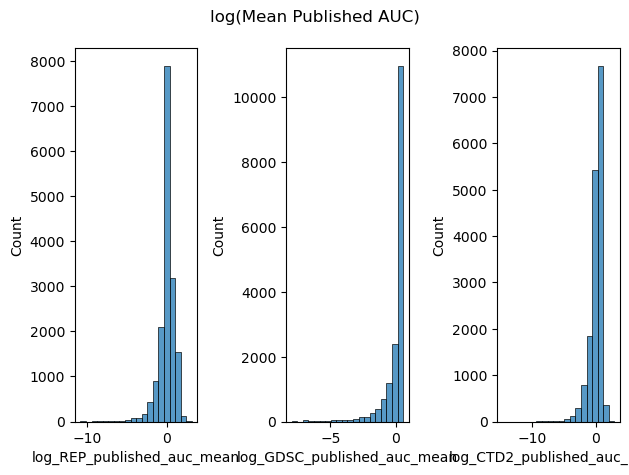

In [32]:
plt.clf()
fig = plt.figure()
suptitle = 'log(Mean Published AUC)'
plt.suptitle(suptitle)
plt.subplot(1, 3, 1)
sns.histplot(df['log_REP_published_auc_mean'], bins=NBINS)
plt.subplot(1, 3, 2)
sns.histplot(df['log_GDSC_published_auc_mean'], bins=NBINS)
plt.subplot(1, 3, 3)
sns.histplot(df['log_CTD2_published_auc_mean'], bins=NBINS)
fig.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

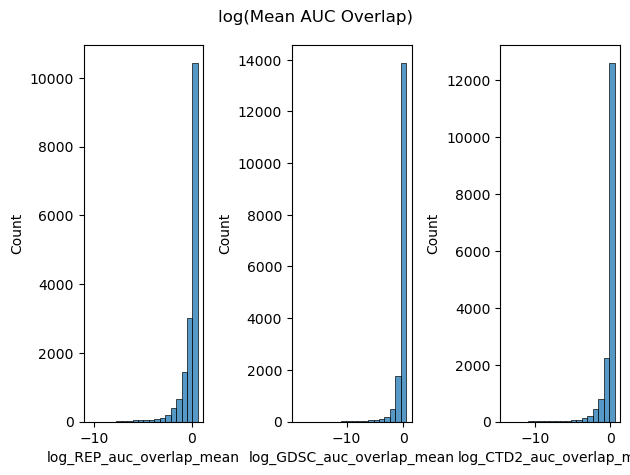

In [33]:
plt.clf()
fig = plt.figure()
suptitle = 'log(Mean AUC Overlap)'
plt.suptitle(suptitle)
plt.subplot(1, 3, 1)
sns.histplot(df['log_REP_auc_overlap_mean'], bins=NBINS)
plt.subplot(1, 3, 2)
sns.histplot(df['log_GDSC_auc_overlap_mean'], bins=NBINS)
plt.subplot(1, 3, 3)
sns.histplot(df['log_CTD2_auc_overlap_mean'], bins=NBINS)
fig.tight_layout()
plt.show()